<a href="https://colab.research.google.com/github/JsubToSky/Lab-1-Red-Interconexi-n/blob/main/Logit_Admitance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base de datos de estudiantes admitidos según puntaje de SAT.


Esta base de datos que se presenta con el nombre binary predictors se encuentra relacionada a un contexto de estudiantes que son o no admitidos a una institución educativa, indicando los puntajes que obtuvieron en la prueba SAT. A continuación se presenta el desarrollo del análisis descriptivo de la base llamada binary predictors, de la cúal se extrae la base de Admittance. Posteriormente se realizará un modelo de machine learning usando una regresión logistica para predecir si es admitido o no el estudiante basado en el puntaje del SAT y/o Género.

## Análisis descriptivo

Inicialmente se importan la librerías que se han de usar para manejar, manipular y graficar los datos. También se importa sklearn que permite generar el modelo de predicción y calcular sus métricas

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

Usando la librerías se importa la base de datos Admittance y binary predictors

In [ ]:
raw_data_1 = pd.read_csv('/content/drive/MyDrive/Catalina Castro/Analítica/2.01. Admittance (1).csv')
data1 = raw_data_1.copy()
data1['Admitted'] = data1['Admitted'].map({'Yes':1,'No':0})
data1.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_data_2 = pd.read_csv('/content/drive/MyDrive/Catalina Castro/Analítica/2.02. Binary predictors (1).csv')
data2 = raw_data_2.copy()
data2['Admitted'] = data2['Admitted'].map({'Yes':1,'No':0})
data2['Gender'] = data2['Gender'].map({'Female':1,'Male':0})
data2.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


Como se puede observar, ambas bases de datos tienen los mismos datos, con la unica diferencia que la de binary predictor agregar la variable __Gender__ para cada estudiante. Dado que son los mismos datos, se puede realizar en análisis descriptivo para la que tenga más variables, puesto que compartira los mismos comportamientos de la variable __SAT__. A continuación se muestran las medidas de frecuencia de los datos.

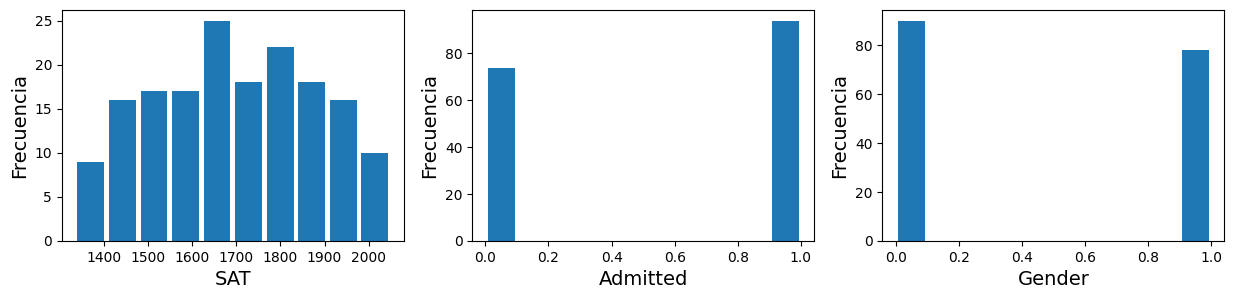

In [ ]:
plt.figure(figsize=(15,3)) # determinar el tamaño de la imagen generada

for i in range(0,3,1): # ciclo para graficar 5 graficos distintos
  plt.subplot(1, 3, i+1) # indicar la posición dentro de la imagen de cada grafico
  plt.hist(data2.iloc[:,i],rwidth = 0.85) # graficar en un histograma cada columna del DataFrame
  plt.xlabel(data2.iloc[:,i].name, fontsize=14) # tomar el nombre de cada columna como titulo del eje horizontal
  plt.ylabel("Frecuencia", fontsize=14) # Mostrar como titulo del eje vertical la palabra "Frecuencia"

plt.show() # mostrar el grafico final

A partir de estas frecuencias se puede observar que en la base de datos se encuentran más estudiantes admitidos que no admitidos, y además hay una mayor cantidad de hombres dentro de la muestra. En cuanto al SAT se puede ver una distribución parecida a una gaussiana pero de campana ancha, indicando una gran desviación estándar.

Para complementar este gráficos se puede mostrar un gráfico de distribución de las notas del SAT y probar su normalidad

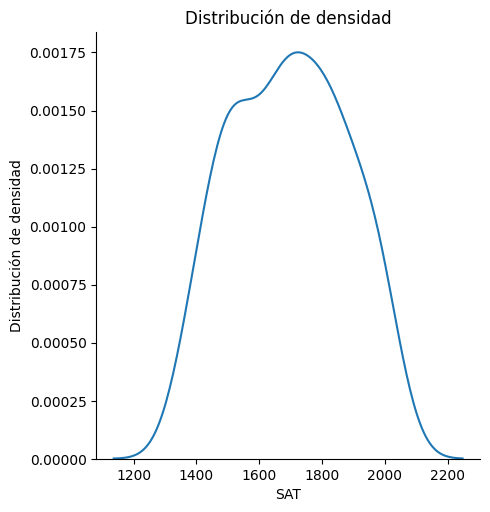

In [ ]:
sns.displot(data2.iloc[:,0],kind ="kde") # Realizar un gráfico de distribución de los datos del SAT
plt.ylabel("Distribución de densidad") # Título eje vertical
plt.title("Distribución de densidad") # Título del gráfico
plt.show() # Mostrar el gráfico

Si se realiza una prueba de Kolmogorov-Smirnov con $α = 0.05$ se obtiene el siguiente resultado

In [ ]:
import scipy.stats as stats
'''
Ho: los datos son normales
Ha: los datos no son normales
'''
statistic, pvalue = stats.kstest(data2.iloc[:,0],'norm')
statistic, pvalue

(1.0, 0.0)

> Dado que el p-value es igual a 0.0, existe evidencia significativa para rechazar la hipótesis de que los datos son normales.

Una vez que se separen los datos se pueden comparar sus resultados del SAT cuando cambia su condición de admisión o género:

In [ ]:
AdmitYes = data2[data2['Admitted']==1]
AdmitNo = data2[data2['Admitted']==0]
Male = data2[data2['Gender']==0]
Female = data2[data2['Gender']==1]

Ahora se pueden comparar los puntajes del SAT según de acuerdo a si es admitido o no, y si es hombre o mujer:

In [ ]:
print("----------------------------")
print(data2.groupby('Admitted').describe()['SAT'].round(3))
print("----------------------------")
print(data2.groupby('Gender').describe()['SAT'].round(3))
print("----------------------------")

----------------------------
          count      mean      std     min      25%     50%     75%     max
Admitted                                                                   
0          74.0  1525.324   93.624  1334.0  1464.00  1525.0  1590.0  1697.0
1          94.0  1829.064  110.426  1631.0  1743.25  1825.0  1929.5  2050.0
----------------------------
        count      mean      std     min      25%     50%     75%     max
Gender                                                                   
0        90.0  1629.933  177.857  1334.0  1486.25  1593.0  1745.0  2050.0
1        78.0  1770.667  159.174  1393.0  1676.00  1775.0  1890.0  2041.0
----------------------------


De estos resultados se puede observar que  los promedios del puntaje SAT son diferentes para los que fueron o no admitidos, adicionalmente teniendo en cuenta las desviaciones estándares, máximos y mínimos se puede ver que se diferencian los datos pero existe un mínimo de traslape de puntajes. Para el caso de género se percibe una diferencia menor con el mismo análisis. Es importante notar que la distribución de los datos no es igual para cada categoría. Esto se podría observar en el siguiente diagrama de torta, aunque primero es necesario calcular las proporciones para gráficar.

In [ ]:
Admit0 = data2.groupby('Admitted').describe()['SAT']['count'][0]/data2.groupby('Admitted').describe()['SAT']['count'].sum()
Admit1 = data2.groupby('Admitted').describe()['SAT']['count'][1]/data2.groupby('Admitted').describe()['SAT']['count'].sum()
Gen0 = data2.groupby('Gender').describe()['SAT']['count'][0]/data2.groupby('Gender').describe()['SAT']['count'].sum()
Gen1 = data2.groupby('Gender').describe()['SAT']['count'][1]/data2.groupby('Gender').describe()['SAT']['count'].sum()

Una vez que se tienen los valores de de las proporciones ya se puede proceder a graficar

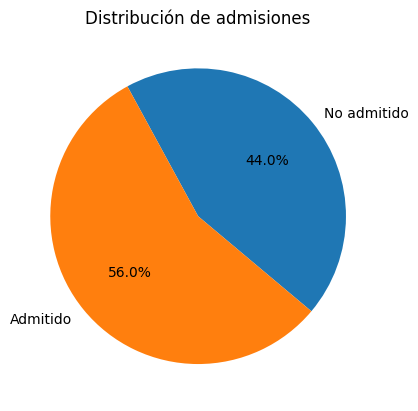

In [ ]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie([Admit0,Admit1], labels=["No admitido","Admitido"], autopct='%1.1f%%',
                                  startangle=-40, wedgeprops=dict(width=1))
ax.set_title('Distribución de admisiones')
plt.show()

Como se mencionó anteriormente se puede ver que la proporción de admitidos es mauyor a la de no admitidos.


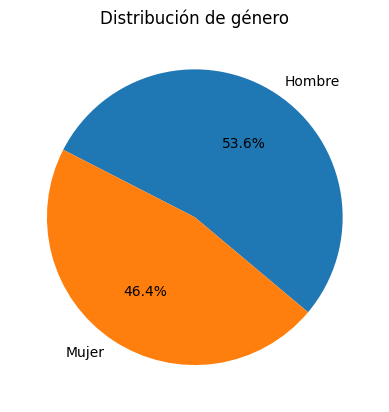

In [ ]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie([Gen0,Gen1], labels=["Hombre","Mujer"], autopct='%1.1f%%',
                                  startangle=-40, wedgeprops=dict(width=1))
ax.set_title('Distribución de género')
plt.show()

A sí mismo se puede ver que hay más datos de hombres que de mujeres.

Además de los gráficos de torta se pueden realizar gráficos de cajas y bigotes con la intención de ver datos atípicos, la dispersión de los datos y posibles diferencias de medianas entre los grupos de género y admitidos o no admitidos.

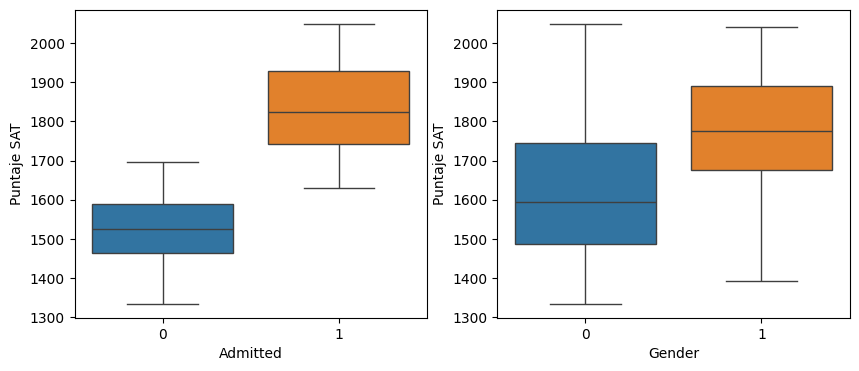

In [ ]:
plt.figure(figsize=(10,4)) # determinar tamaño de la imagen

plt.subplot(1, 2, 1) # indicar la posición del diagrama
sns.boxplot(x="Admitted",y=data2.iloc[:,0].name,data=data2,hue='Admitted',legend=False) # realizar el diagrama de boxplot
plt.ylabel("Puntaje SAT") # título del eje vertical
plt.legend

plt.subplot(1, 2, 2) # indicar la posición del diagrama
sns.boxplot(x="Gender",y=data2.iloc[:,0].name,data=data2,hue='Gender',legend=False) # realizar el diagrama de boxplot
plt.ylabel("Puntaje SAT") # título del eje vertical

plt.show() # mostrar el gráfico

Como se puede observar, los puntajes del SAT, a simple vista, son diferentes para estudiantes admitidos y no admitidos, y entre hombres y mujeres. Vale la pena recordar la notación:  

* Admitido (1) y no admitido (0)
* Hombre (0) y Mujer (1)

Para confirmar si las diferencias del puntaje promedio para las personas de distintos géneros y admisión, es necesario realizar una comparación de medias como se muestra a continuación:

In [ ]:
from scipy import stats
"""
H0: las medias de los puntajes obtenidos en el SAT son iguales entre hombres y mujeres que fueron o no admitidos.
H1: hay diferencia entre las medias de hombres y mujeres en el SAT que fueron o no admitidos.
"""
statistic, pvalue1 = stats.ttest_ind(AdmitYes.iloc[:,0], AdmitNo.iloc[:,0], equal_var=False)
statistic, pvalue2 = stats.ttest_ind(Male.iloc[:,0], Female.iloc[:,0], equal_var=False)
print("Admitidos vs. No amditidos : p-value =",pvalue1)
print("Hombres vs. Mujeres : p-value =",pvalue2)

Admitidos vs. No amditidos : p-value = 3.9978207533544187e-44
Hombres vs. Mujeres : p-value = 2.1553254453523288e-07


Se puede observar que hay evidencia suficiente para rechazar el la hipótesis nula, por lo tanto los promedios del puntaje SAT son significativamente diferente para hombres y mujeres, que fueron o no admitidos.

### Conclusión
Se pudo observar que la calificación promedio del SAT de los estudiantes en promedio es significativamente diferente para quienes fueron admitidos y no, y entre hombres y mujeres. Se pudo observar que aunque la proporción de los datos para cada categoría (Admisión y género) es diferente, no presentan diferencias extremas que puedan representar sesgos por desproporcionalidad de representación de cada categoría de estudiante.

## Modelo de regresión logística


Dado que se tiene la base de datos Admittance y binary predictors, se puede realizar dos modelos difererentes que posteriormente se puedan comparar entre sí

In [ ]:
X1 = data1[['SAT']]
y1 = data1['Admitted']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X1)
X1_std = sc.transform(X1)

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(
  X1_std, y1, test_size=0.3, random_state=42)

In [ ]:
X1_combined_std = np.vstack((X1_train, X1_test))
y1_combined = np.hstack((y1_train, y1_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(C=100.0, solver='lbfgs')
lr1.fit(X1_train, y1_train)

LogisticRegression(C=100.0)

In [ ]:
lr1.predict_proba(X1_test[:3, :])

array([[9.18040419e-01, 8.19595806e-02],
       [9.99781999e-01, 2.18001461e-04],
       [3.43197138e-04, 9.99656803e-01]])

In [ ]:
 lr1.predict_proba(X1_test[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [ ]:
lr1.predict_proba(X1_test[:3, :]).argmax(axis=1)
lr1.predict(X1_test[:3, :])

array([0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
lr1.fit(X1_train, y1_train)
y1_pred = lr1.predict(X1_test)
confmat1 = confusion_matrix(y_true=y1_test, y_pred=y1_pred)
print(confmat1)

[[22  2]
 [ 3 24]]


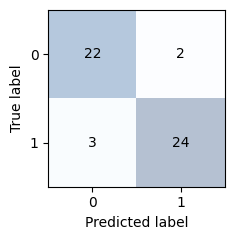

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat1.shape[0]):
  for j in range(confmat1.shape[1]):
    ax.text(x=j, y=i, s=confmat1[i, j], va='center', ha='center')
    ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y1_test, y_pred=y1_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.92      0.89      0.91        27

    accuracy                           0.90        51
   macro avg       0.90      0.90      0.90        51
weighted avg       0.90      0.90      0.90        51



In [ ]:
accuracy1 = accuracy_score(y1_test, y1_pred)
print("Precisión: ")
accuracy1.round(3)

Precisión: 


0.902

La accuracy es de 0.902 que es cercano a 1 por lo cual es un modelo bueno es la proporción de lo califico bien, los verdaderos positivos y los verdaderos negativos sobre el total de datos.

In [ ]:
recall1 = recall_score(y1_test, y1_pred)
print("Exahustividad: ")
recall1.round(3)

Exahustividad: 


0.889

La exahustividad es lo mismo que el FPR es decir la tasa de de los verdaderos positivos con respecto a todos lo que realmente si eran positivos. Por esta razón se espera q

In [ ]:

f1score1 = f1_score(y1_test, y1_pred)
print("F1 score: ")
f1score1.round(3)

F1 score: 


0.906

In [ ]:
error1 = (confmat1[1,0]+confmat1[0,1])/(confmat1[:,:].sum())
accu1 = 1-error1

print("Error: "+str(error1.round(3))+"\n"+"Accuracy:"+str(accu1.round(3)))

Error: 0.098
Accuracy:0.902


In [ ]:
mcc1 = matthews_corrcoef(y1_test, y1_pred)
print("coeficiente de correlación de matthews: ")
mcc1.round(3)

coeficiente de correlación de matthews: 


0.804

In [ ]:
tpr1 = confmat1[0,0]/(confmat1[0,:].sum())
tpr1.round(4)

0.9167

In [ ]:
fpr1 = confmat1[1,0]/(confmat1[1,:].sum())
fpr1.round(4)

0.1111

In [ ]:
PRE1 = confmat1[0,0]/confmat1[:,0].sum()
PRE1.round(3)


0.88

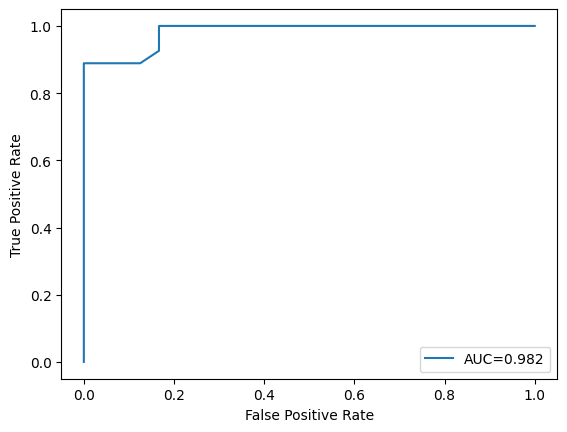

In [ ]:
#define metrics
y1_pred_proba = lr1.predict_proba(X1_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y1_test,  y1_pred_proba)
auc1 = metrics.roc_auc_score(y1_test, y1_pred_proba)
#create ROC curve
plt.plot(fpr1,tpr1,label="AUC="+str(auc1.round(3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

###Modelo de Regresión Logística Base de datos de admitidos según puntaje de SAT y género.

In [ ]:
X2 = data2.iloc[:,[0,2]]
y2 = data2.iloc[:,1]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X2_train)
X2_train_std = sc.transform(X2_train)
X2_test_std = sc.transform(X2_test)


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=f'Class {cl}', edgecolor='black')
  # highlight test examples
  if test_idx:
    # plot all examples
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='Test set')


In [ ]:
X2_combined_std = np.vstack((X2_train_std, X2_test_std))
y2_combined = np.hstack((y2_train, y2_test))

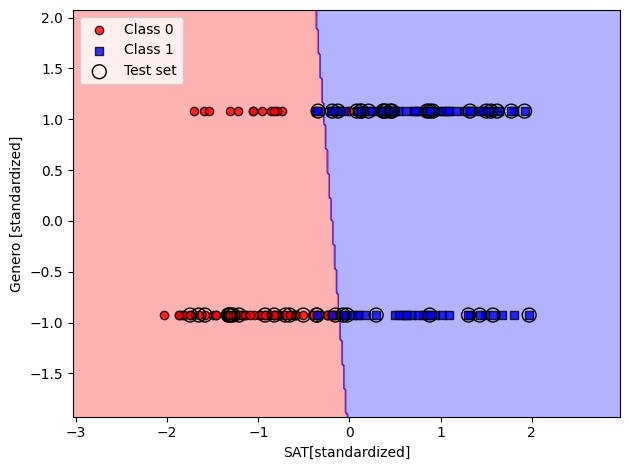

In [ ]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr2.fit(X2_train_std, y2_train)
plot_decision_regions(X2_combined_std, y2_combined, classifier=lr2, test_idx=range(105, 150))
plt.xlabel('SAT[standardized]')
plt.ylabel('Genero [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('figures/03_06.png', dpi=300)
plt.show()


In [ ]:
lr2.predict_proba(X2_test_std[:3, :])

array([[9.37858370e-01, 6.21416304e-02],
       [9.99777428e-01, 2.22571919e-04],
       [2.46323902e-04, 9.99753676e-01]])

In [ ]:
 lr2.predict_proba(X2_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [ ]:
lr2.predict_proba(X2_test_std[:3, :]).argmax(axis=1)
lr2.predict(X2_test_std[:3, :])

array([0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
lr2.fit(X2_train, y2_train)
y2_pred = lr2.predict(X2_test)
confmat2 = confusion_matrix(y_true=y2_test, y_pred=y2_pred)
print(confmat2)


[[23  1]
 [ 2 25]]


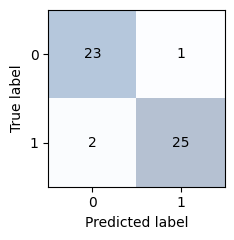

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat2.shape[0]):
  for j in range(confmat2.shape[1]):
    ax.text(x=j, y=i, s=confmat2[i, j], va='center', ha='center')
    ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y2_test, y_pred=y2_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.96      0.93      0.94        27

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51



In [ ]:
error2 = (confmat2[1,0]+confmat2[0,1])/(confmat2[:,:].sum())
accu2 = 1-error2

print("Error: "+str(error2.round(3))+"\n"+"Accuracy:"+str(accu2.round(3)))

Error: 0.059
Accuracy:0.941


In [ ]:
fpr2 = confmat2[1,0]/(confmat2[0,:].sum())
fpr2.round(4)

0.0833

In [ ]:
tpr2 = confmat2[1,1]/(confmat2[1,:].sum())
tpr2.round(4)

0.9259

In [ ]:
PRE2 = confmat2[0,0]/confmat2[:,0].sum()
print("Exactitud:")
PRE2.round(3)

Exactitud:


0.92

In [ ]:
accuracy2 = accuracy_score(y2_test, y2_pred)
print("Precisión: ")
accuracy2.round(3)

Precisión: 


0.941

In [ ]:
recall2 = tpr2
print("Exahustividad: ")
recall2.round(3)

Exahustividad: 


0.926

In [ ]:
f1score2 = f1_score(y2_test, y2_pred)
print("F1 score: ")
f1score2.round(4)

F1 score: 


0.9434

In [ ]:
error2 = (confmat2[1,0]+confmat2[0,1])/(confmat2[:,:].sum())
accu2 = 1-error2
print("Error: "+str(error2.round(3))+"\n"+"Accuracy:"+str(accu2.round(3)))

Error: 0.059
Accuracy:0.941


In [ ]:
mcc2 = matthews_corrcoef(y2_test, y2_pred)
print("coeficiente de correlación de matthews: ")
mcc2.round(3)

coeficiente de correlación de matthews: 


0.883

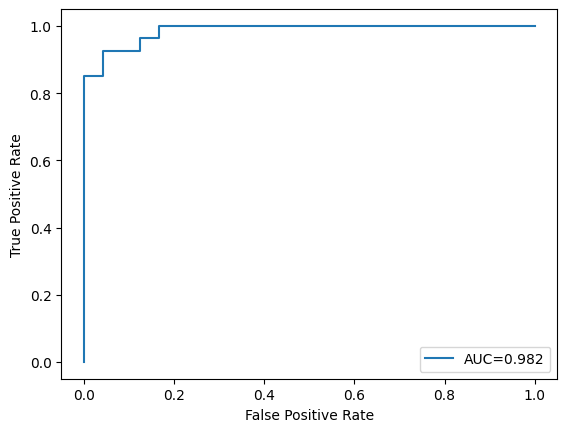

In [ ]:
#define metrics
y2_pred_proba = lr2.predict_proba(X2_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y2_test,  y2_pred_proba)
auc2 = metrics.roc_auc_score(y2_test, y2_pred_proba)
#create ROC curve
plt.plot(fpr2,tpr2,label="AUC="+str(auc1.round(3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()